## Companion notebook for "Enhancing reproducibility in bioimage analysis: focus on controls and effect sizes, not just p-values"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Enhancing reproducibility in bioimage analysis: focus on controls
and effect sizes, not just p-values".

If you are interested in taking a look at the original images of Fascin knockdown (KD) HeLa cells under different experimental conditions from [Lawson et al., 2022](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9427113/), these are freely available on the [Image Data Resource](https://idr.openmicroscopy.org) under accession number IDR0139. We selected specific wells (Fig. 2-3: J05, O02, E22, L08; Fig. 4: J05, I19, G15, O02, B02, N12, L08, L18, H13, E22, H10, B06) from plate number 1093711385 for use in this work.

We took into consideration three channels for each image: cell nuclei (Hoescht), Fascin and actin. Moreover, we compared data from specific pharmacological compounds (Fig. 1-3: SN0212398523; Fig. 4: SN0212398523, SN1066932540, SN1054616339), with three controls: untreated (negative control), DMSO (vehicle control), and Leptomycin b (positive control). Image analysis was performed in CellProfiler, with a pipeline available in associated [GitHub repo](https://github.com/djpbarry/dont-trust-p-values).

#### Import utility functions

In [1]:
import sys
 
# setting path
sys.path.append('../')
 
# importing
from utility_functions import *

#### Set up parameters for plots

In [2]:
plt.rcParams['font.size'] = 26
color_dict = {'SN1066932540': 'red', 
              'SN1054616339': 'yellow', 
              'SN0212398523': 'orange', 
              'Untreated': 'blue', 
              'DMSO': 'gray', 
              'Leptomycin b': 'purple'}

#### Set up variables

In [3]:
plate_number = 1093711385
treatment_col = 'Treatment'
variable_of_interest = 'Fascin_Ratio'
dunn_pairs = [('Untreated', 'DMSO'), ('DMSO', 'SN0212398523'), ('SN0212398523', 'Leptomycin b'),
              ('Untreated', 'SN0212398523'), ('Untreated', 'Leptomycin b'), ('DMSO', 'Leptomycin b')]

#### Set up input and output folders

In [4]:
directories = ('./inputs/idr', './outputs/plots', './outputs/data')

for d in directories:
    if not os.path.exists(d):
        os.makedirs(d)

#### Download plate annotations in the input folder

In [5]:
idr_annotations_file_path = './inputs/idr/idr0139-screenA-annotation.csv'
idr_annotations_url = 'https://raw.githubusercontent.com/IDR/idr0139-lawson-fascin/main/screenA/idr0139-screenA-annotation.csv'

download_csv(idr_annotations_file_path, idr_annotations_url)

File already exists.


#### Load CellProfile analysis output

In [6]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_number)
compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Proprietary Compound'].to_dict()
treatments_to_compounds = {'Treated': 'Treated', 'Negative Control': 'Untreated', 
                           'Neutral Control': 'DMSO', 'Stimulator Control': 'Leptomycin b'}
image_data = pd.read_csv('./inputs/cell_profiler_outputs/Image.csv')
nuc_data = pd.read_csv('./inputs/cell_profiler_outputs/Nuclei.csv')
cyto_data = pd.read_csv('./inputs/cell_profiler_outputs/Cytoplasm.csv')
treatments = annotations.set_index('Well')['Control Type'].to_dict()

#### Select data subsets

In [7]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds, compounds,
                           ['J05', 'O02', 'E22', 'L08'])

In [8]:
data_subset1 = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds, compounds,
                           ['J05', 'I19', 'G15', 'O02', 'B02', 'N12', 'L08', 'L18', 'H13', 'E22', 'H10', 'B06'])

#### Plot figures
##### Figure 2A-F

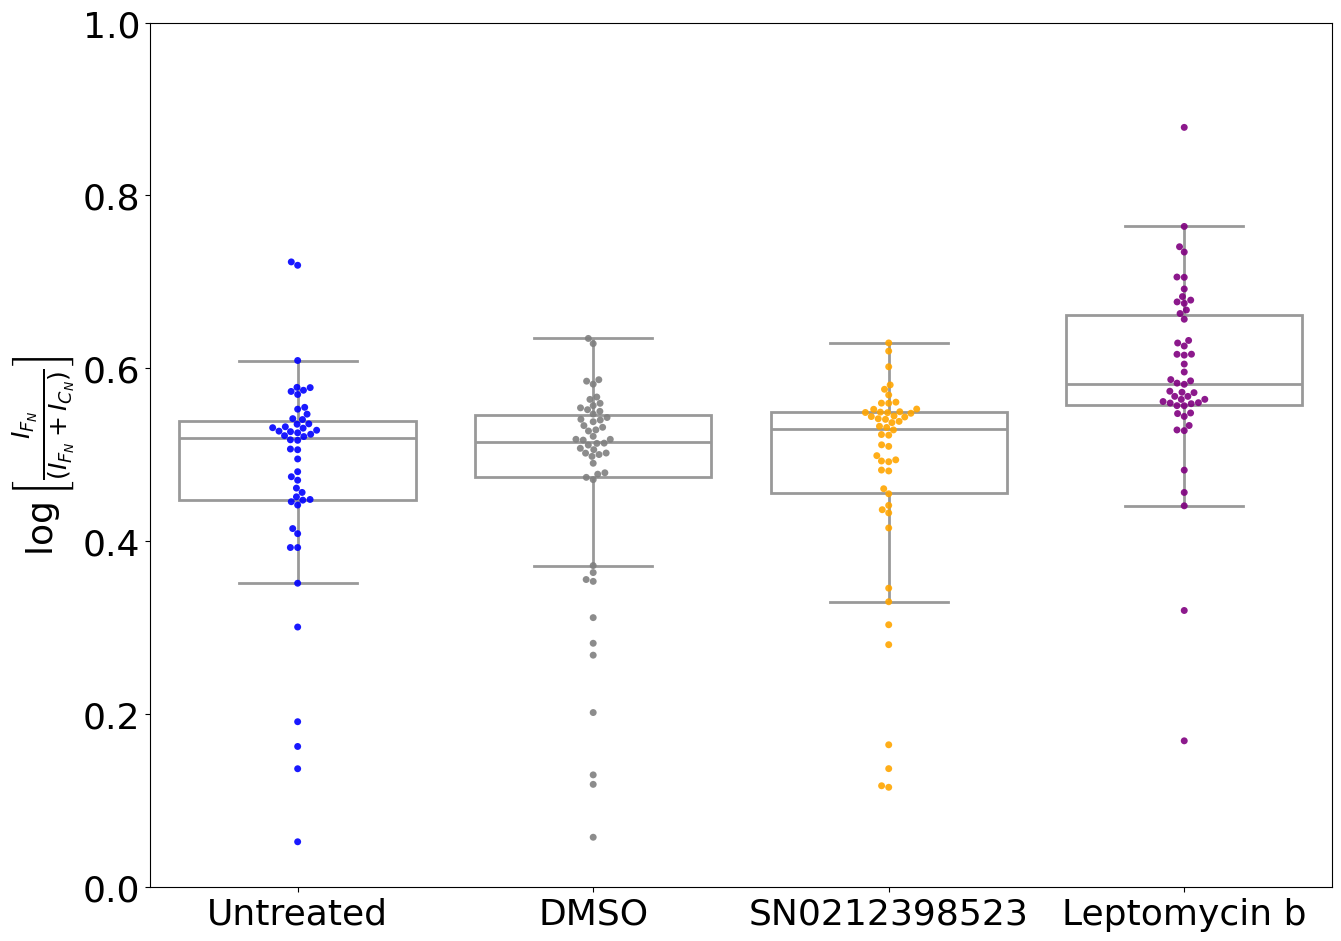

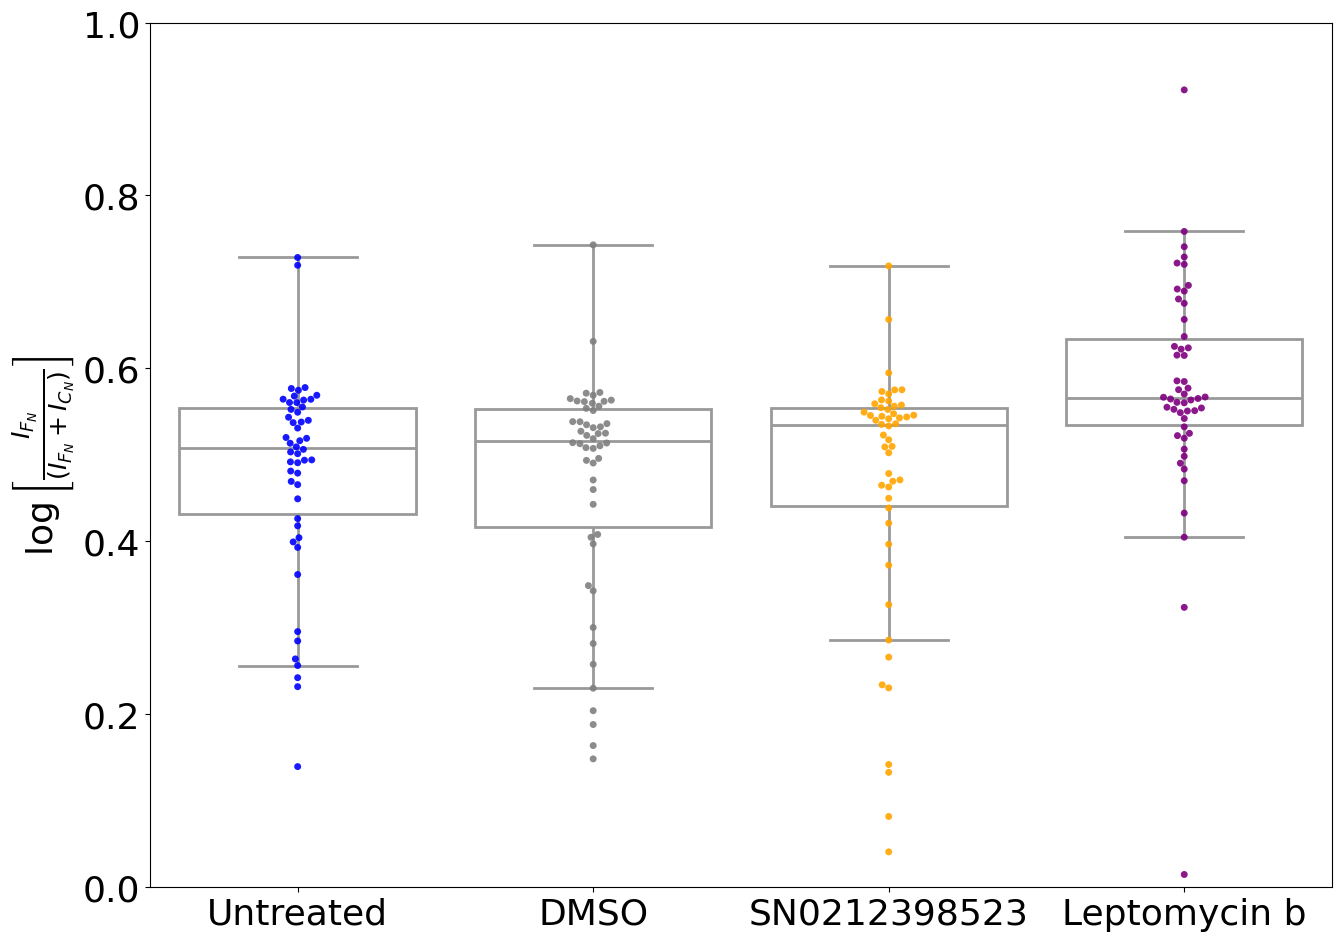

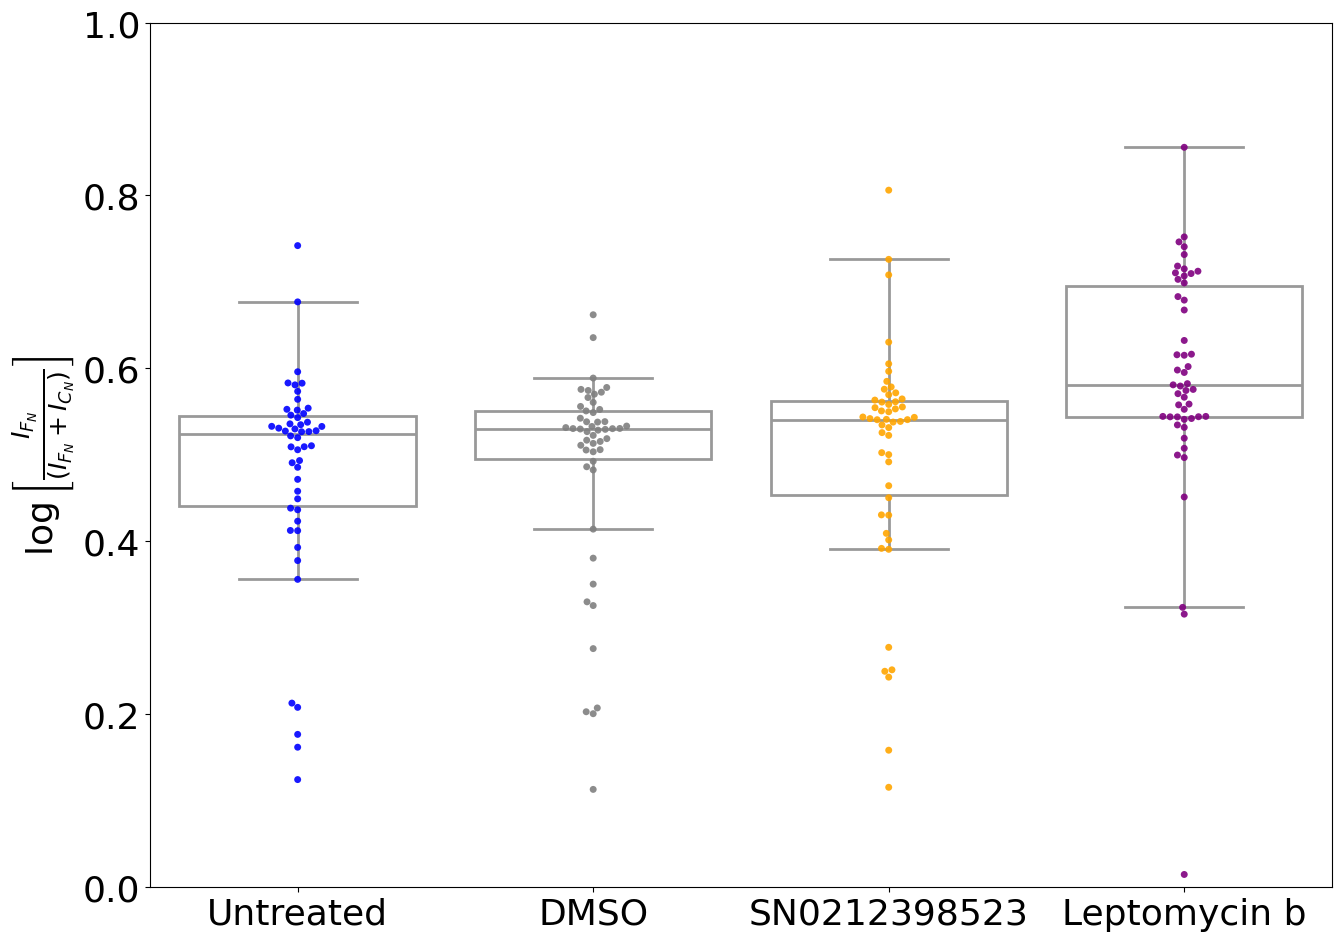

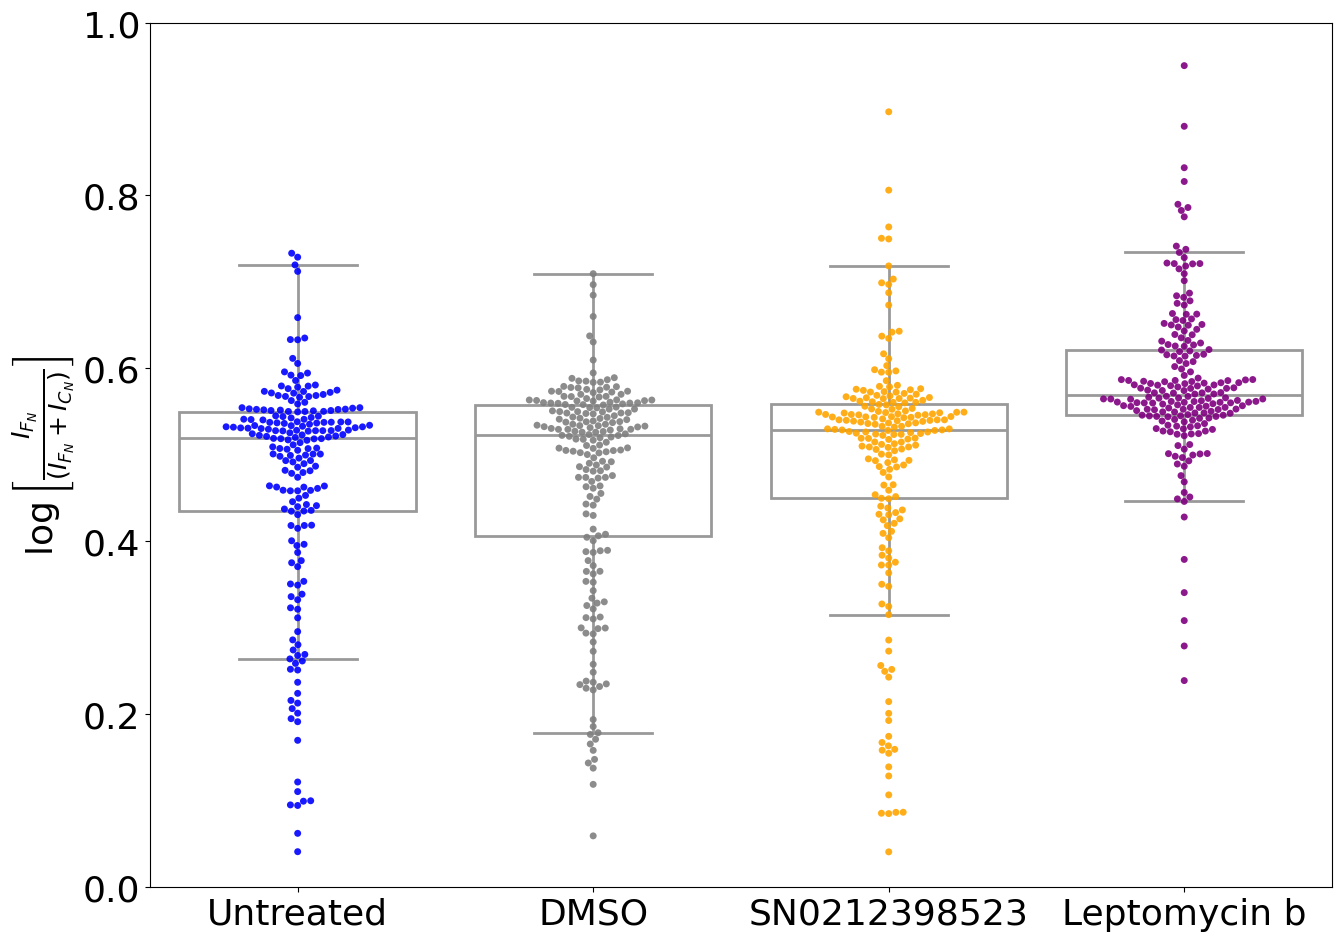

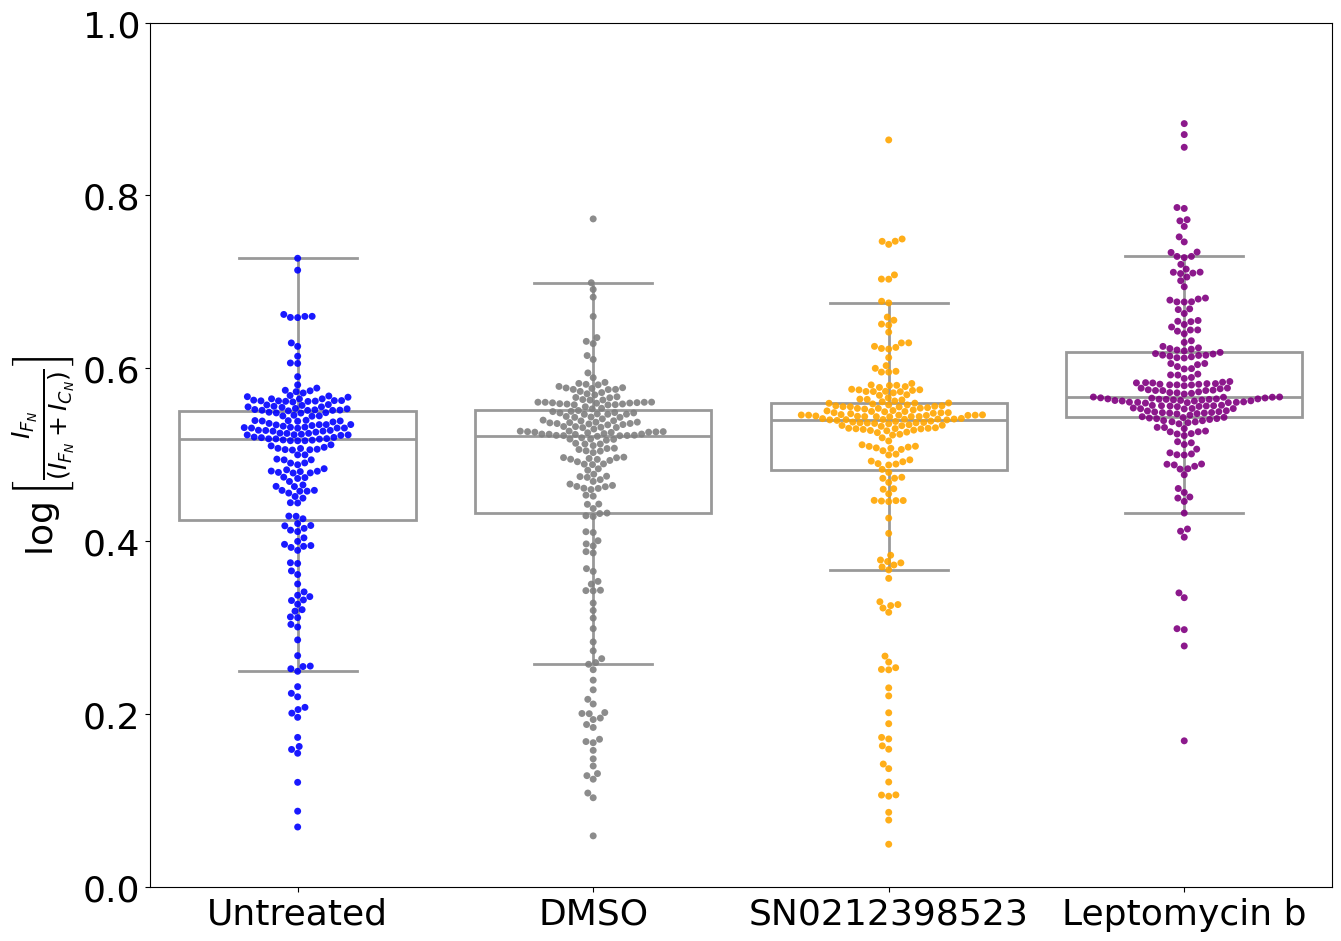

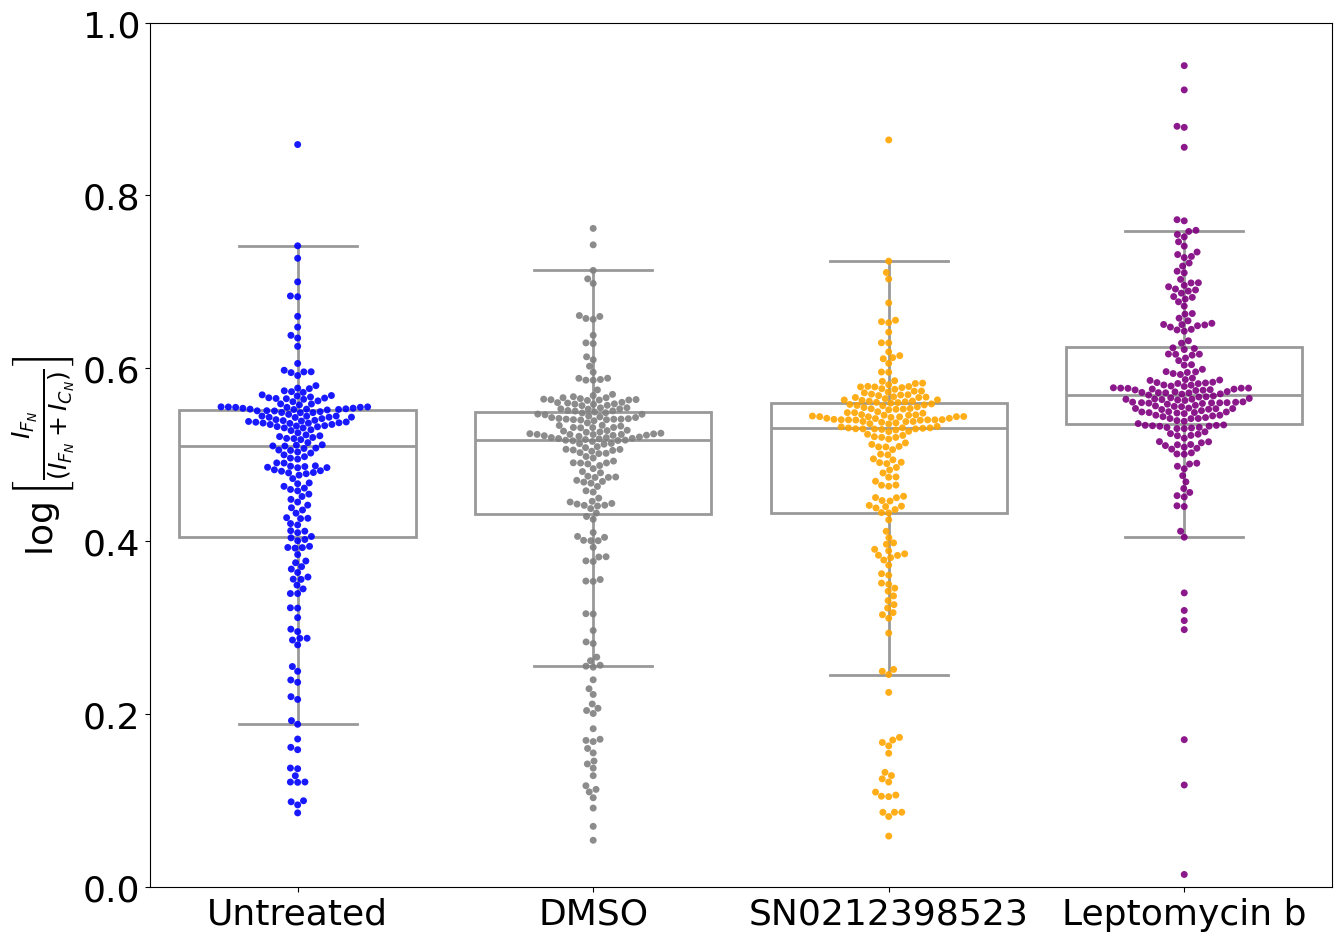

In [9]:
fig_width = 14
fig_height = 10
plot_rows = 1
plot_cols = 1
plot_order = ['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b']
n_samples = 1
data = data_subset
y_label = '$ \\log \\left[ \\frac {I_{F_N}}{(I_{F_N} + I_{C_N})} \\right]$'

for s in [50, 200]:
    for i in range(3):
        generate_swarmplot(fig_width, fig_height, plot_rows, plot_cols, plot_order, n_samples, s, data,
                       color_dict, treatment_col, variable_of_interest, y_label)


##### Figure 2G-I

/opt/miniconda3/envs/p-val-env/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/miniconda3/envs/p-val-env/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1649: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


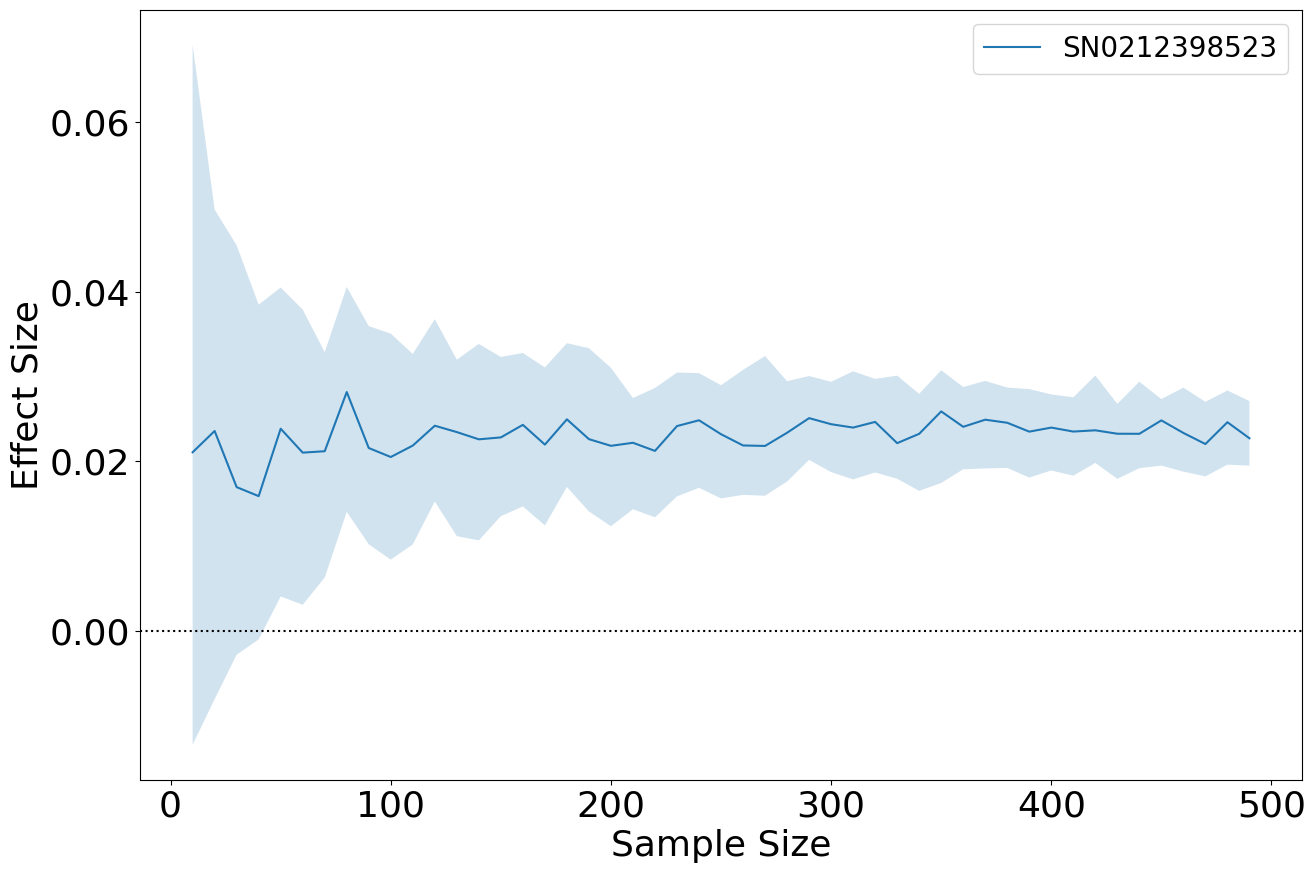

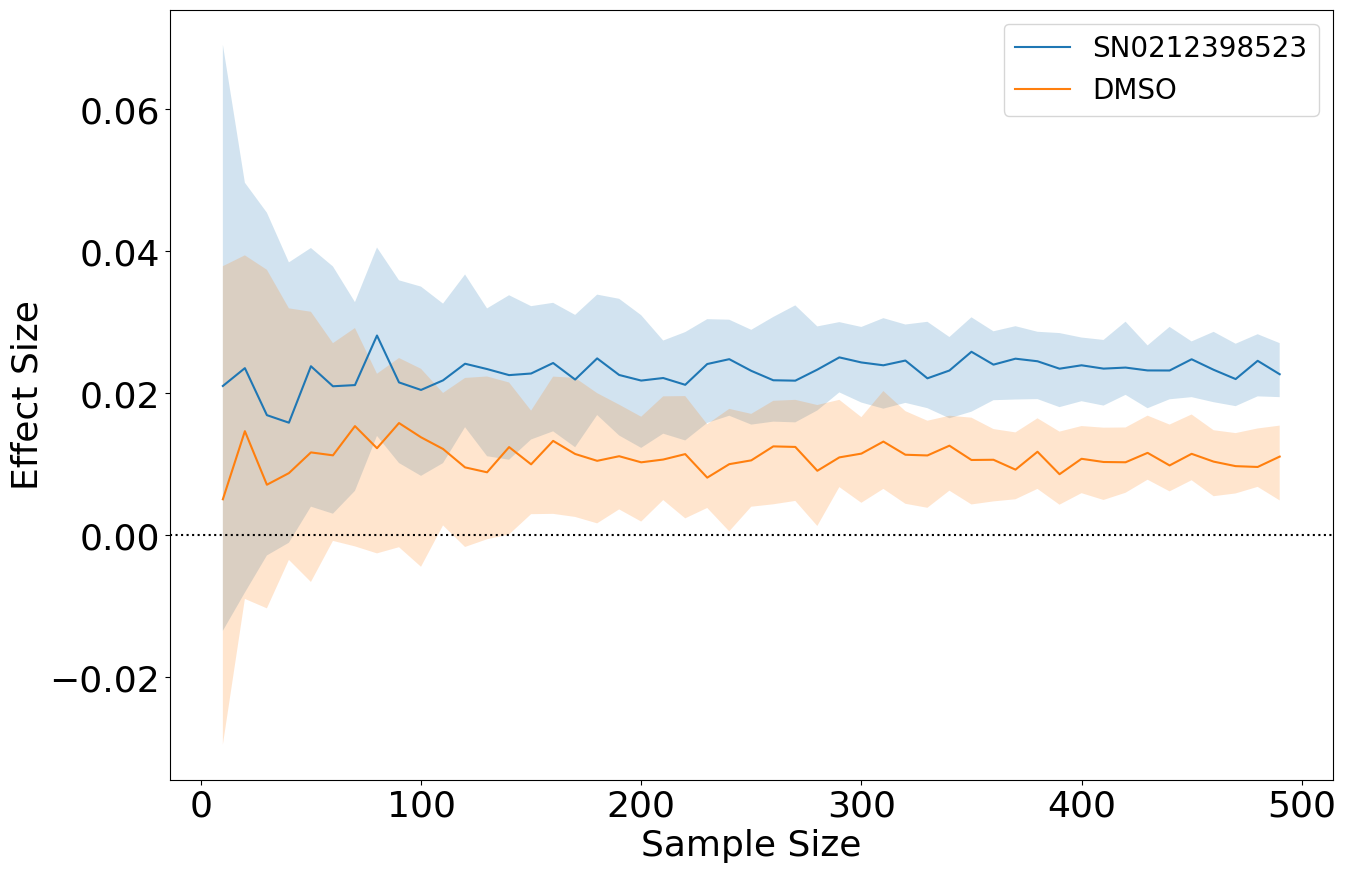

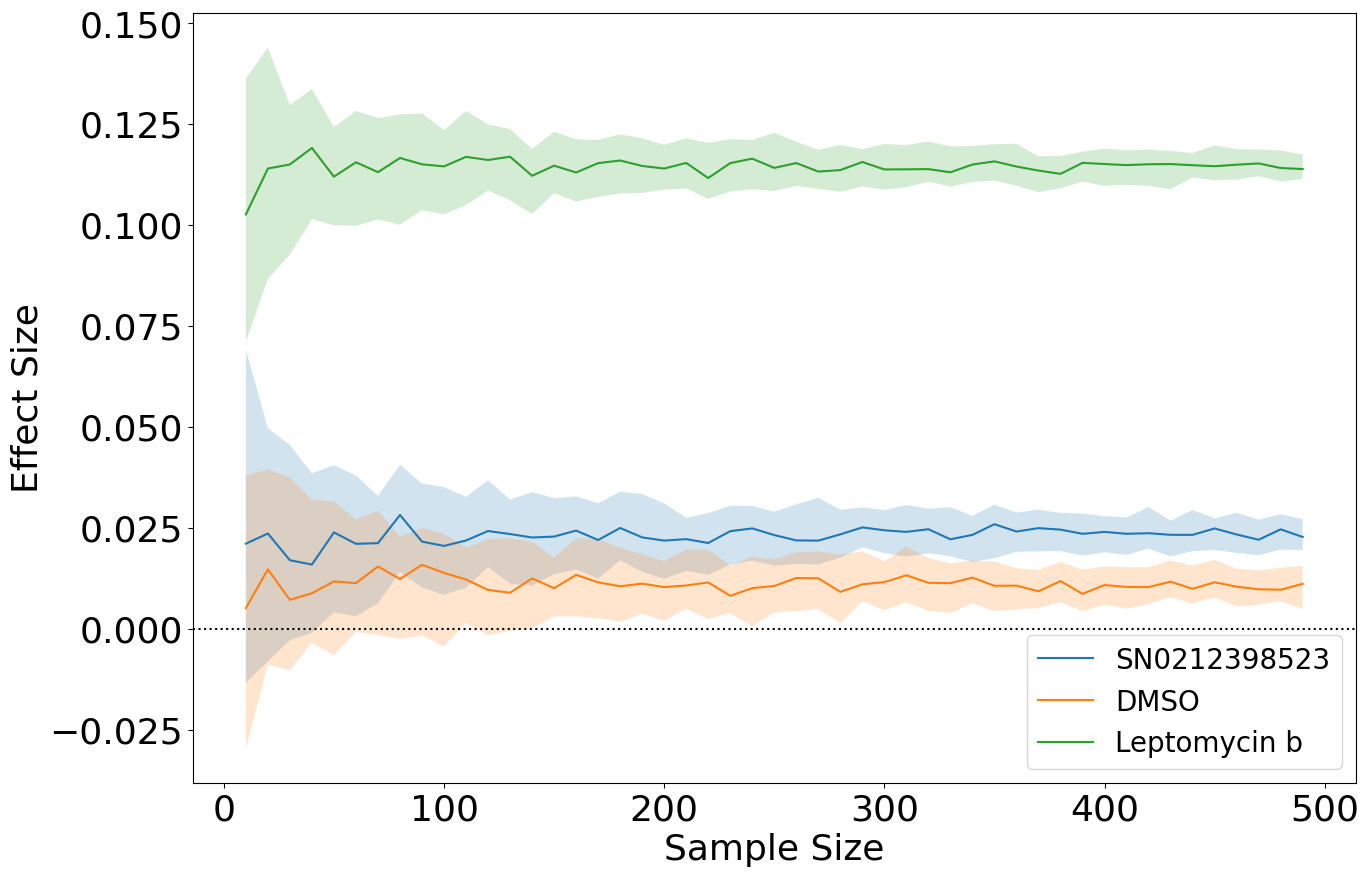

In [10]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100
data = data_subset
y_label = 'Effect Size'
treatments = ['SN0212398523', 'DMSO', 'Leptomycin b']

plot_effect_size_v_sample_size(sample_sizes, num_iterations, data, treatment_col, variable_of_interest, y_label, treatments)

##### Figure 3A

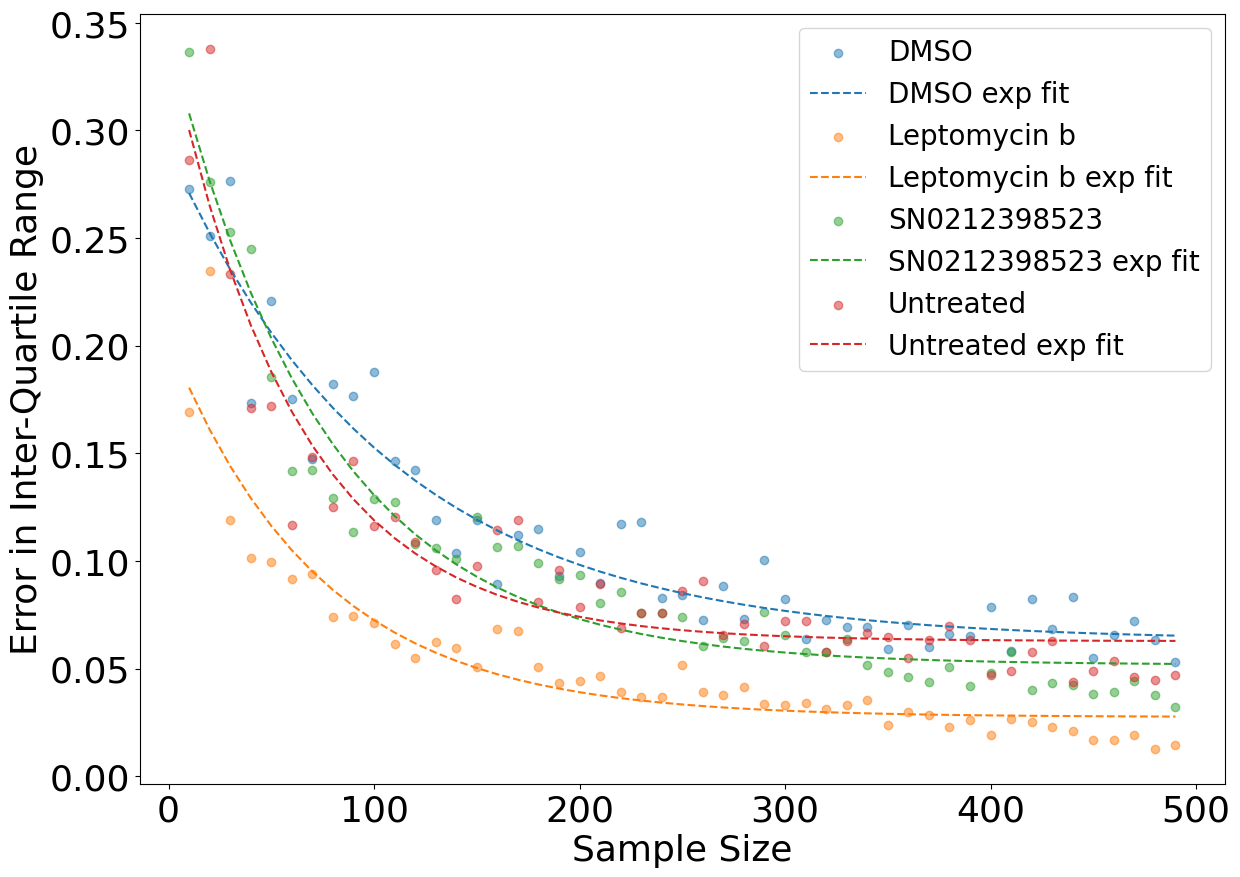

In [11]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100
data = data_subset
y_label = 'Error in Inter-Quartile Range'

plot_iqr_v_sample_size(sample_sizes, num_iterations, data, treatment_col, variable_of_interest, y_label)

##### Figure 3B-H

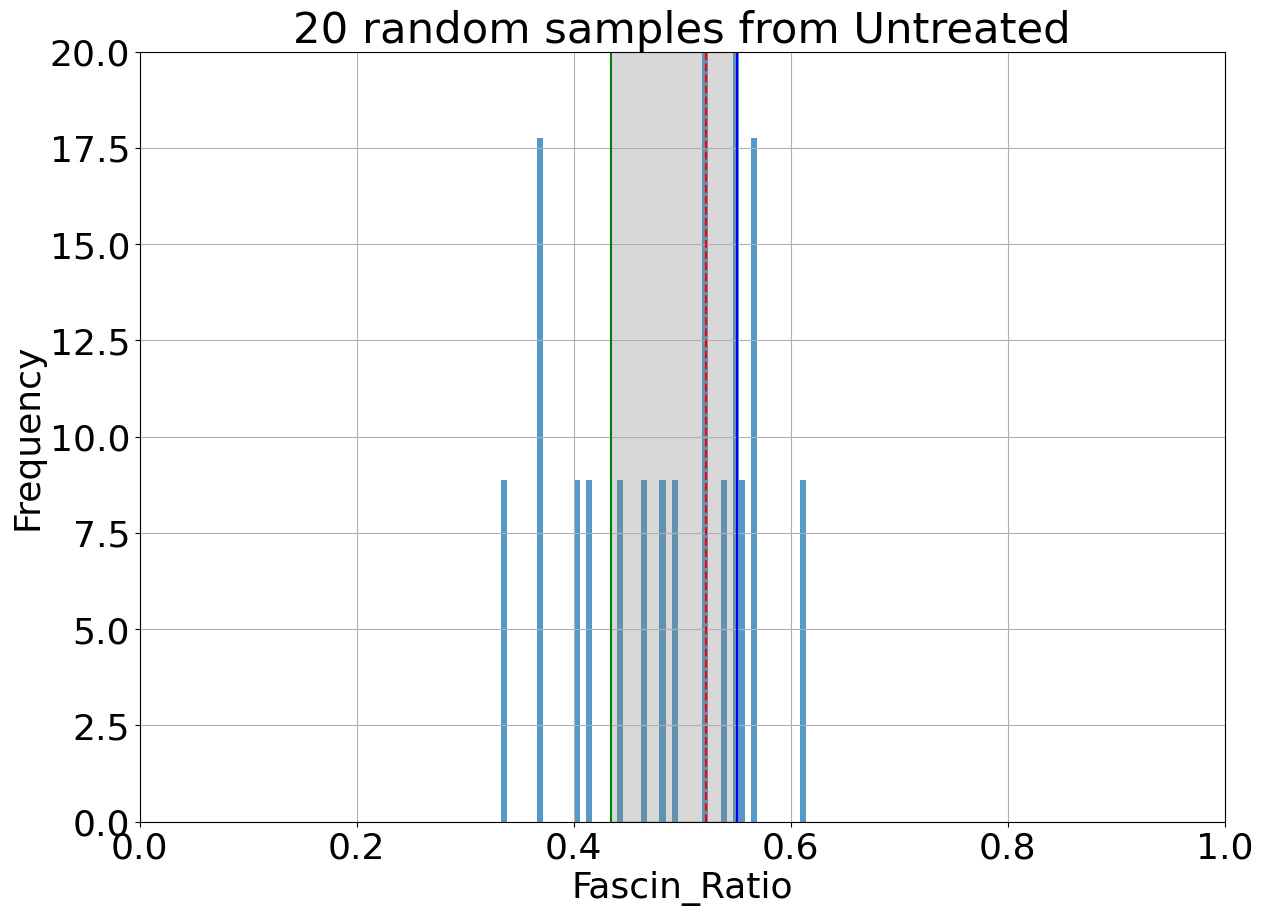

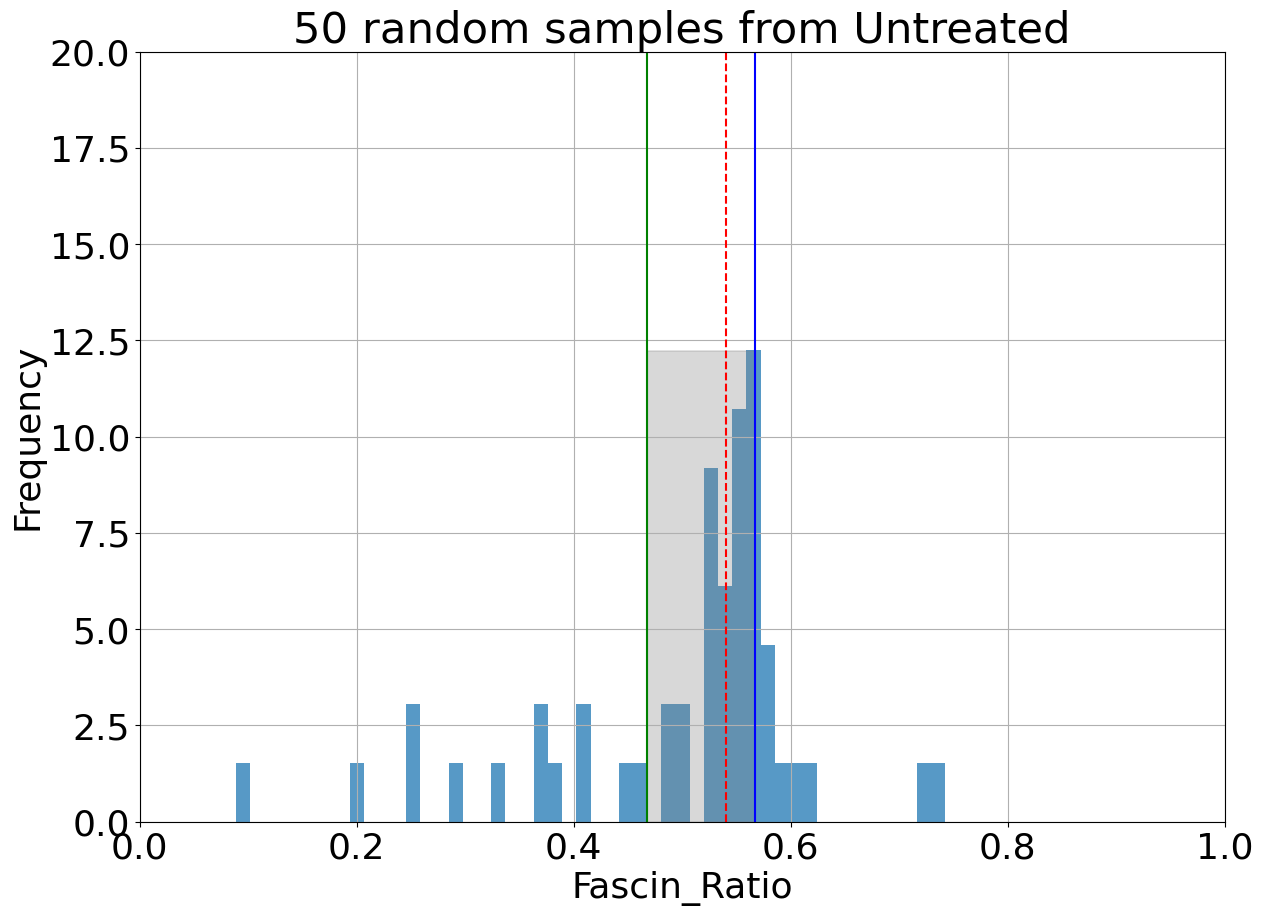

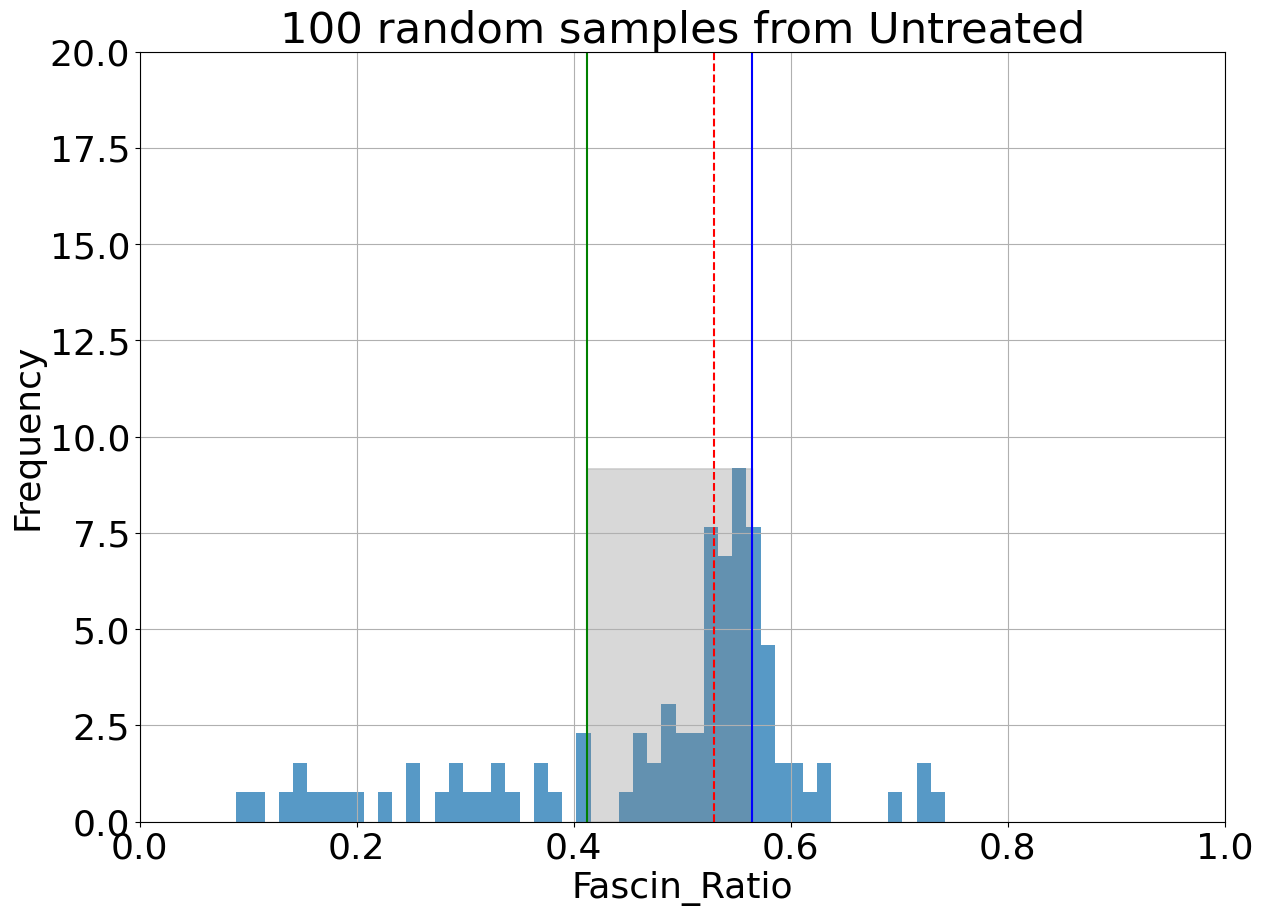

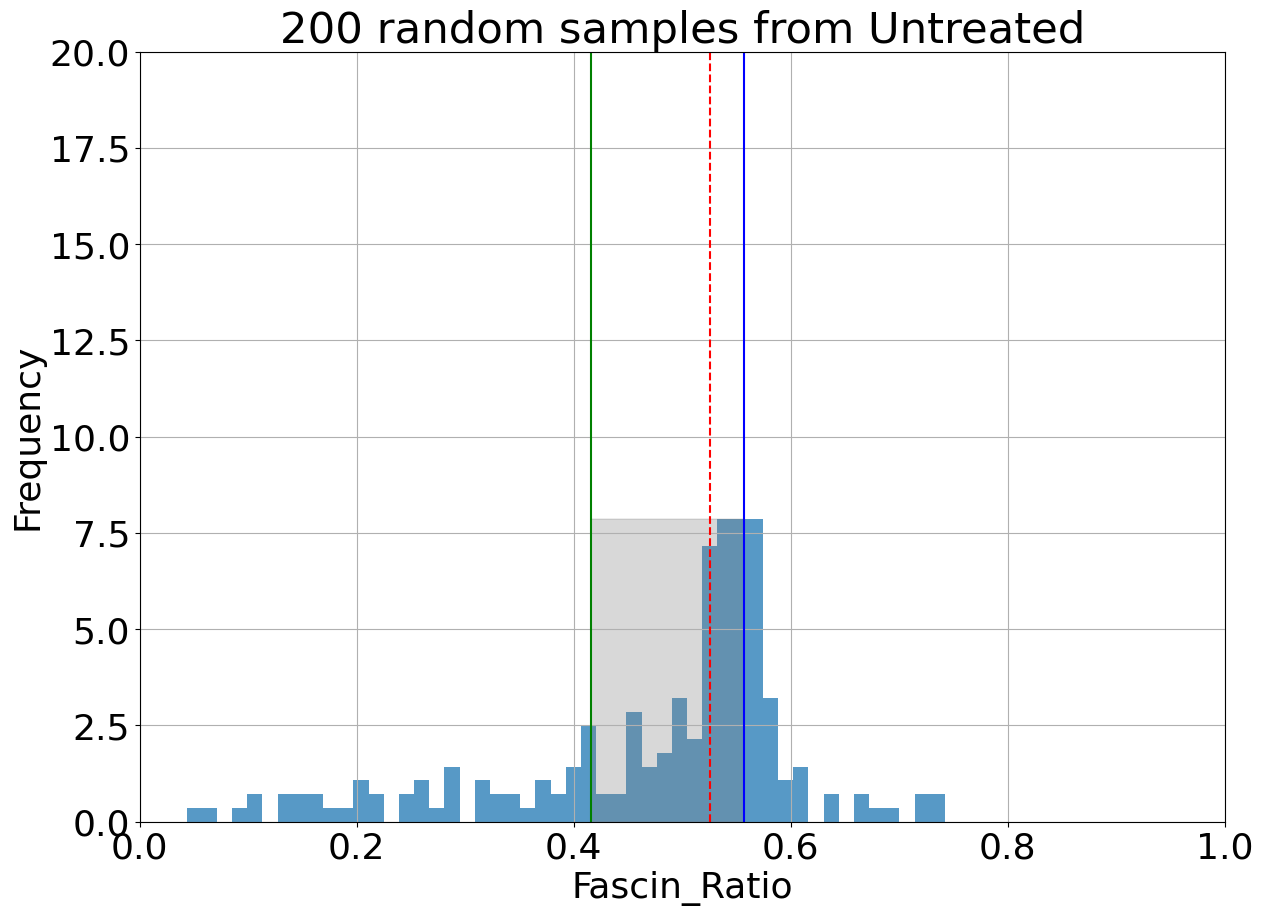

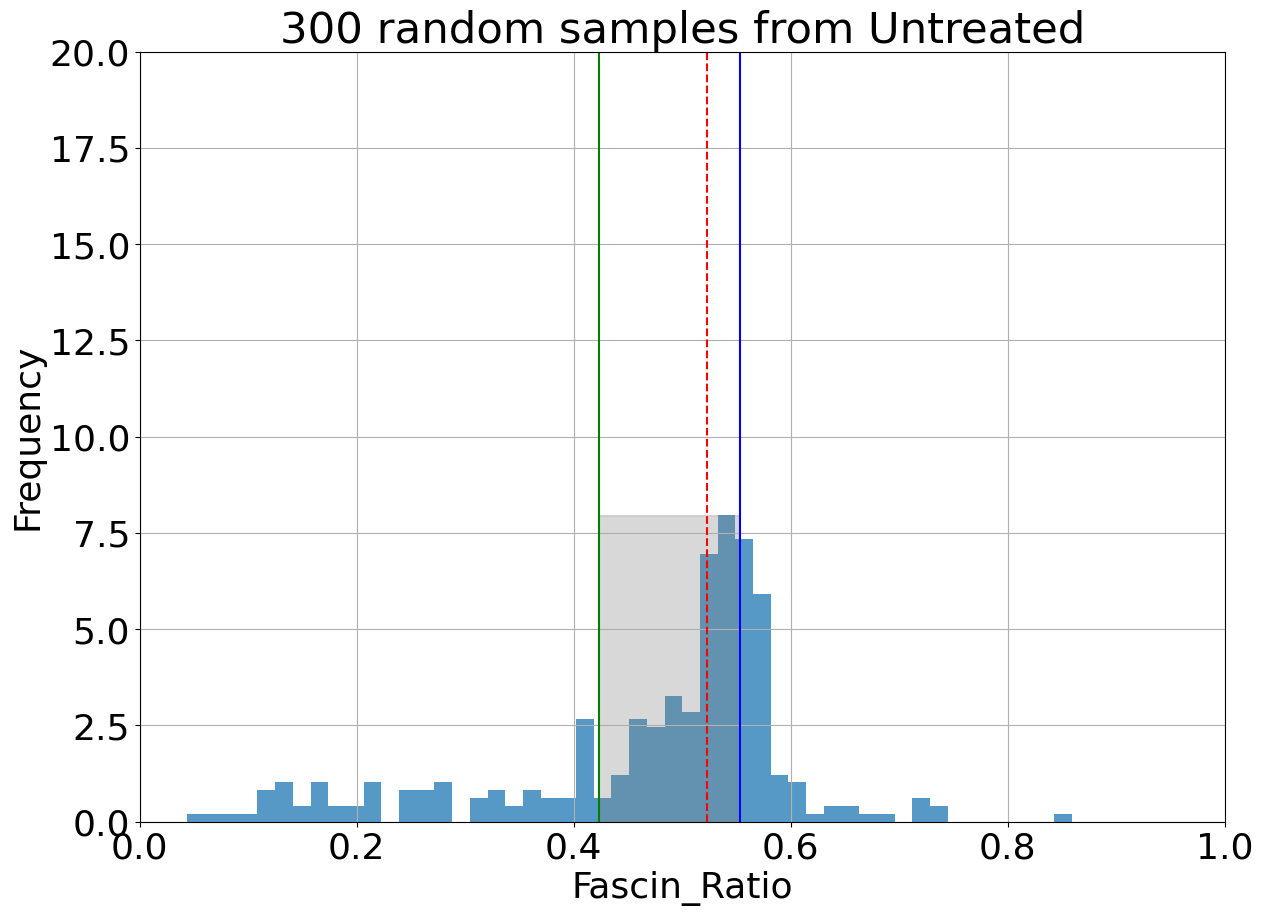

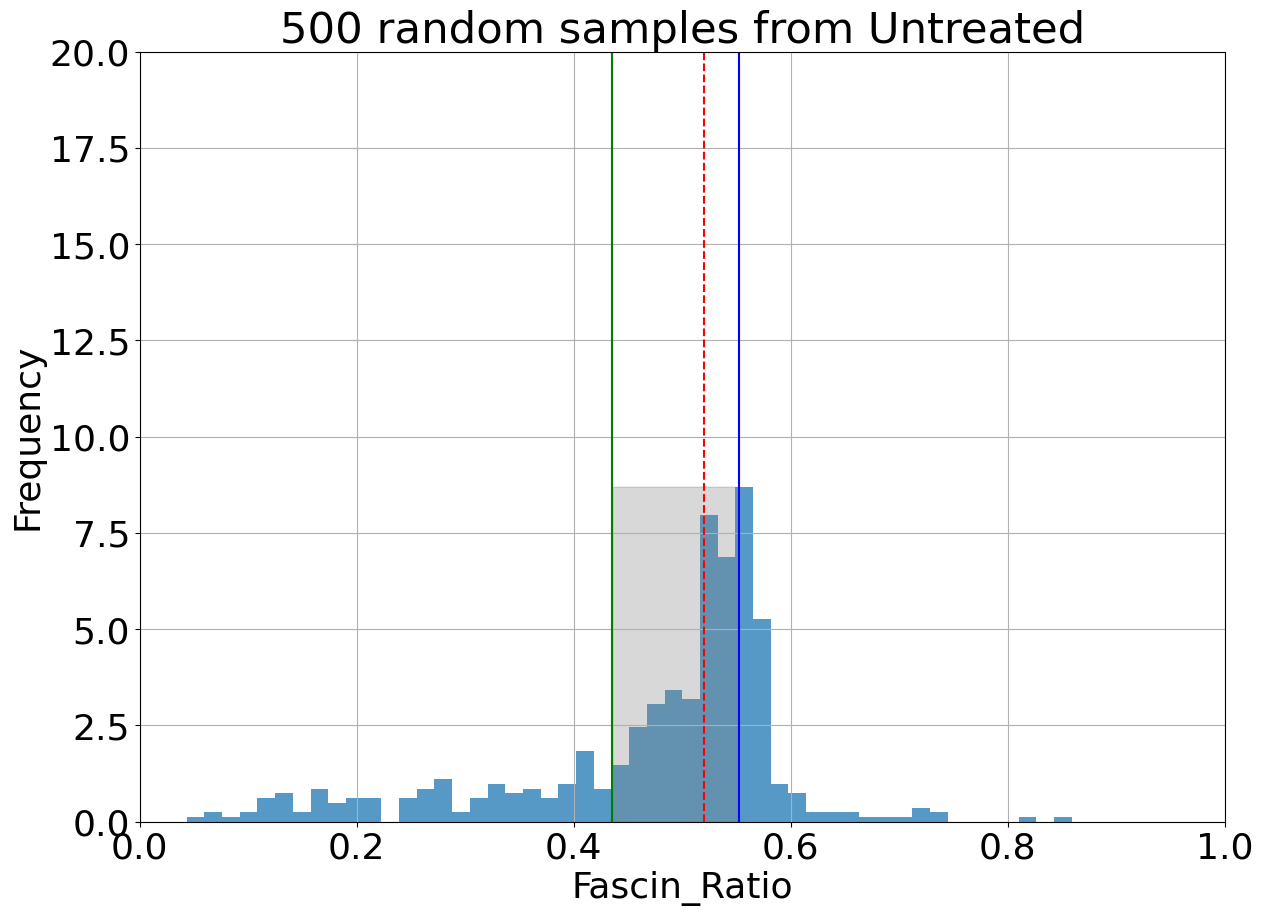

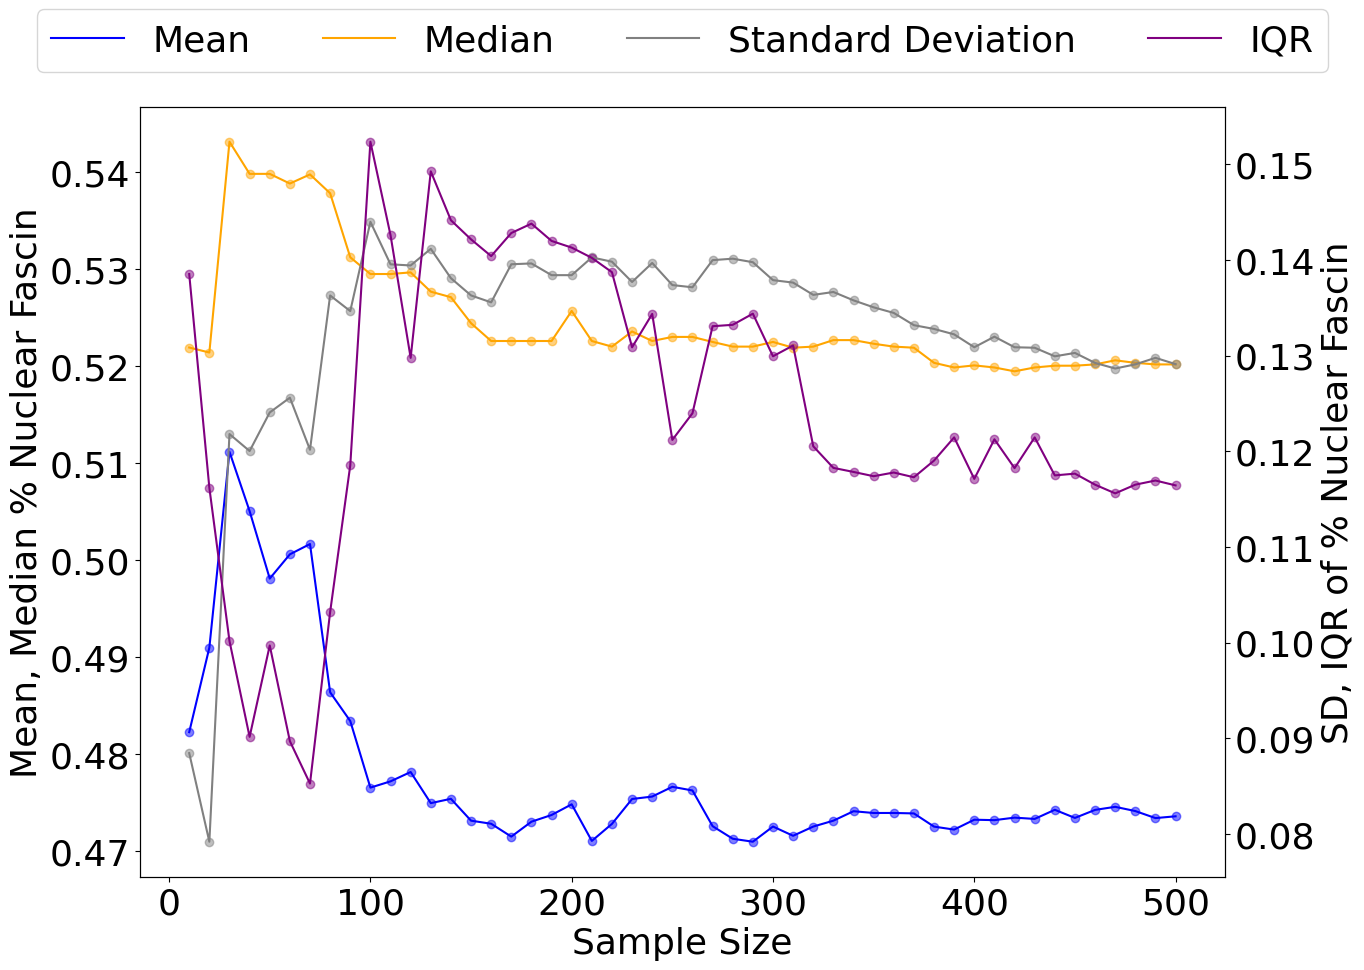

In [12]:
data = data_subset
treatment = 'Untreated'

plot_cumulative_histogram_samples(data, variable_of_interest, treatment_col, treatment)

##### Figure 4A

Treatment: Untreated Well: G15 Mean: 0.5104543591708298
Treatment: Untreated Well: I19 Mean: 0.4867183402211602
Treatment: Untreated Well: J05 Mean: 0.4740596699339411
Treatment: DMSO Well: B02 Mean: 0.4802127130102326
Treatment: DMSO Well: N12 Mean: 0.4562657706777608
Treatment: DMSO Well: O02 Mean: 0.49468896461068285
Treatment: SN0212398523 Well: E22 Mean: 0.4702269074178123
Treatment: SN1054616339 Well: H10 Mean: 0.5010997634894074
Treatment: SN1066932540 Well: B06 Mean: 0.44025897665052255
Treatment: Leptomycin b Well: H13 Mean: 0.5323134336978761
Treatment: Leptomycin b Well: L08 Mean: 0.5748554206379041
Treatment: Leptomycin b Well: L18 Mean: 0.5036956743803708


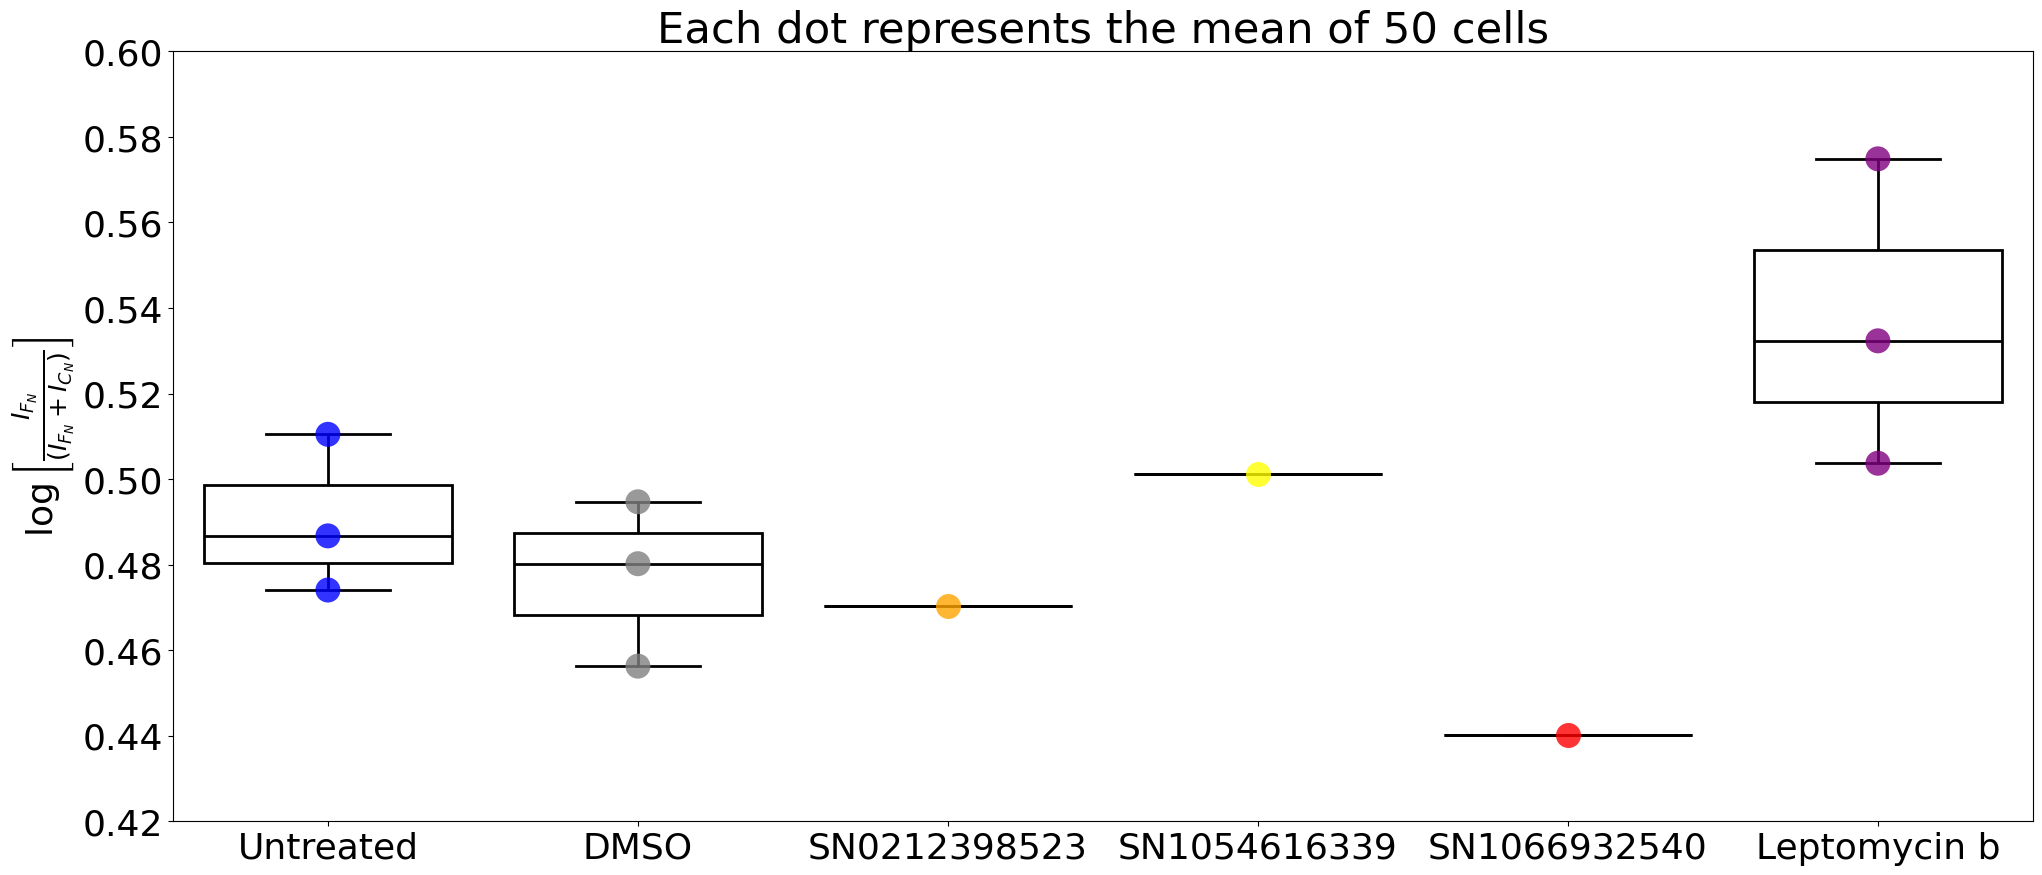

Treatment: Untreated Well: G15 Mean: 0.4982343116220684
Treatment: Untreated Well: I19 Mean: 0.49155965421852327
Treatment: Untreated Well: J05 Mean: 0.46244233473131385
Treatment: DMSO Well: B02 Mean: 0.464253726104896
Treatment: DMSO Well: N12 Mean: 0.4826609654734226
Treatment: DMSO Well: O02 Mean: 0.47469362326370773
Treatment: SN0212398523 Well: E22 Mean: 0.4901083244778007
Treatment: SN1054616339 Well: H10 Mean: 0.4839639266161251
Treatment: SN1066932540 Well: B06 Mean: 0.4385523353674278
Treatment: Leptomycin b Well: H13 Mean: 0.5496528976100648
Treatment: Leptomycin b Well: L08 Mean: 0.5896295540931004
Treatment: Leptomycin b Well: L18 Mean: 0.5433568932623681


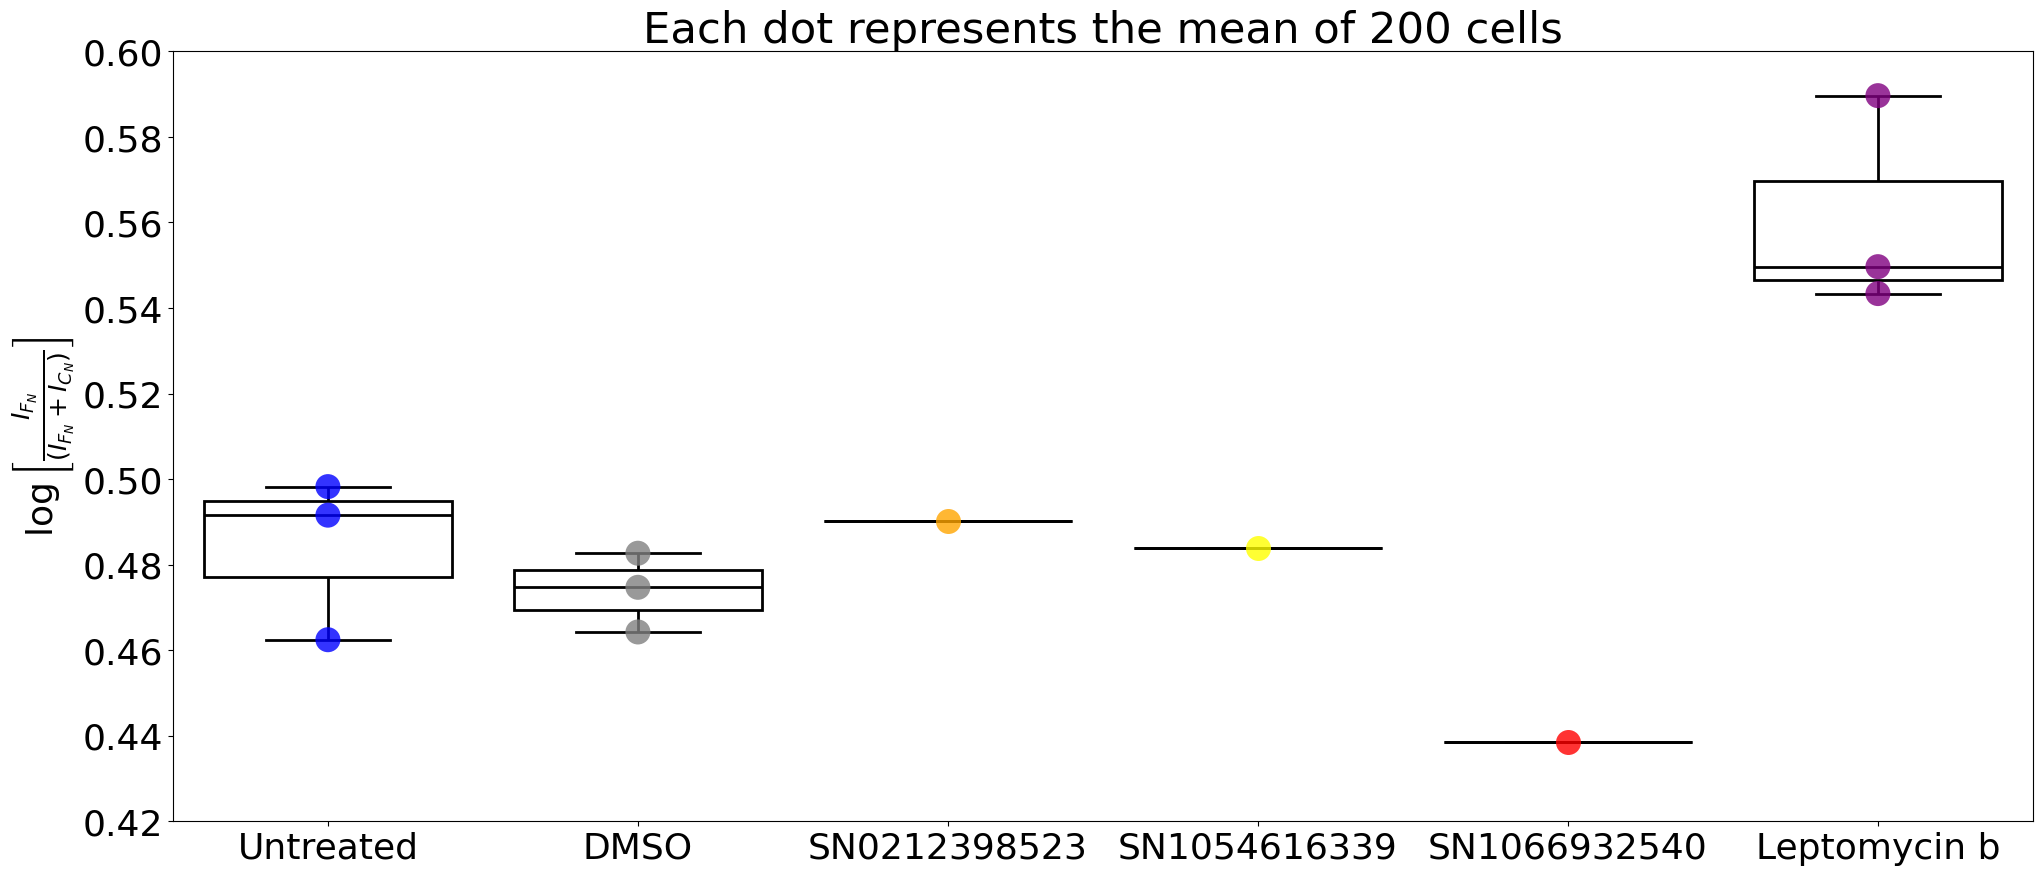

Treatment: Untreated Well: G15 Mean: 0.5038257803557626
Treatment: Untreated Well: I19 Mean: 0.4785039713156101
Treatment: Untreated Well: J05 Mean: 0.4611640674337692
Treatment: DMSO Well: B02 Mean: 0.46025808966663484
Treatment: DMSO Well: N12 Mean: 0.48681118276358676
Treatment: DMSO Well: O02 Mean: 0.48478979042290465
Treatment: SN0212398523 Well: E22 Mean: 0.48973039233013566
Treatment: SN1054616339 Well: H10 Mean: 0.4863361671835951
Treatment: SN1066932540 Well: B06 Mean: 0.4489002473746397
Treatment: Leptomycin b Well: H13 Mean: 0.5568402415580236
Treatment: Leptomycin b Well: L08 Mean: 0.5808857403032068
Treatment: Leptomycin b Well: L18 Mean: 0.540616746639894


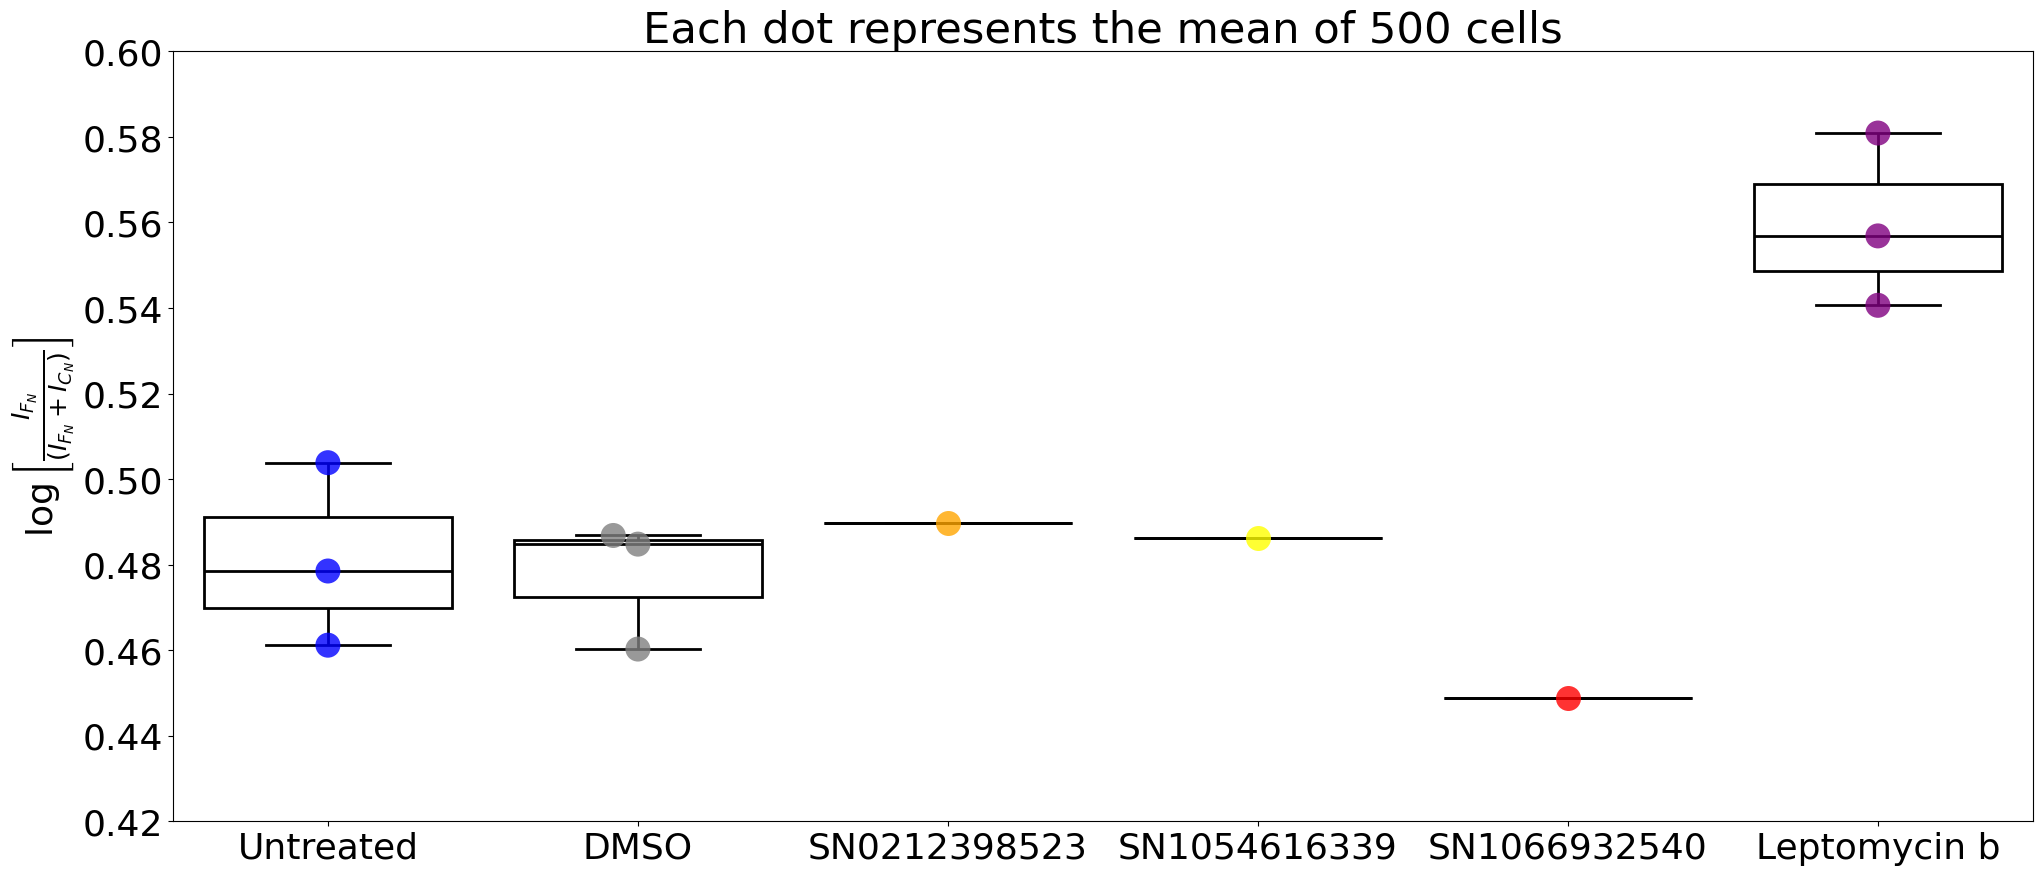

In [14]:
fig_width = 24
fig_height = 10
plot_order = ['Untreated', 'DMSO', 'SN0212398523', 'SN1054616339', 'SN1066932540', 'Leptomycin b']
treatments = ['Untreated', 'DMSO', 'SN0212398523', 'SN1054616339', 'SN1066932540', 'Leptomycin b']
data = data_subset1
y_label = '$ \\log \\left[ \\frac {I_{F_N}}{(I_{F_N} + I_{C_N})} \\right]$'

for s in [50, 200, 500]:
    generate_swarmplot_of_well_means(fig_width, fig_height, plot_order, treatments, data, color_dict, treatment_col,
                                     variable_of_interest, y_label, dunn_pairs, s)